Collborative Filtering - It is a type of filtering which is based on the user behaviour(ratings, clicks and purchases).

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [9]:
#Import ratings dataset
ratings_Org_Data=pd.read_csv('Movies-dataset/ratings.csv')
ratings_Org_Data['timestamp'] = pd.to_datetime(ratings_Org_Data['timestamp'], unit='s')
ratings_Org_Data=ratings_Org_Data.dropna()
ratings_Org_Data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


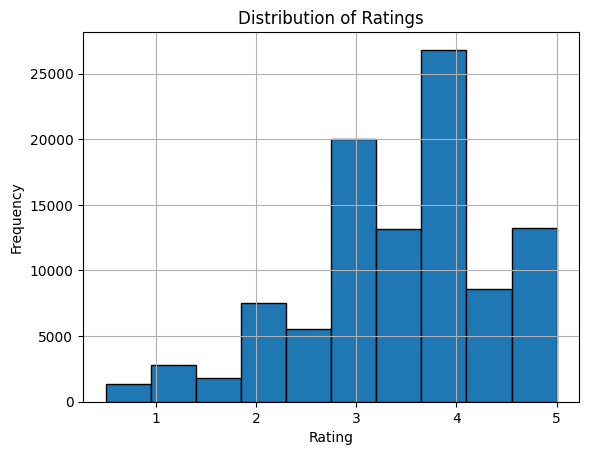

In [10]:
# Plotting histogram to check the distribution of data for different ratings in the dataset
ratings_Org_Data['rating'].hist(bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
movie_count=ratings_Org_Data['movieId'].value_counts()
print(movie_count)
user_count=ratings_Org_Data['userId'].value_counts()
print(user_count)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64
userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64


We need to remove the users and movies with low count. The fundamental of collaborative filtering is overlapping of data.
A movie is recommended to a user A who rated the same movies as user B and if there is a movie which is not watched byuser A but by B so that movie will be suggested to user A as both A and B rated some common movies.
As the concept is common movies rated so there will be users who rated only few movies and movies which are rated by very little users so
we need to remove that as they are outliers and cannot help much in cosine or Pearson methods to find the score of overlapping and can
distort the recommendation.

In [12]:
filtered_ratings = ratings_Org_Data[
    ratings_Org_Data['movieId'].isin(movie_count[movie_count >= 50].index) &
    ratings_Org_Data['userId'].isin(user_count[user_count >= 20].index)
]
filtered_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


There are two ways of implementing the Collaborative filtering, the first one is user-based collaborative filtering where we try to find the similarity based on users, and the other one is item-based filtering. In item-based filtering we filter based on the items for different users by finding the similarity between them.

In [13]:
#Finding the user matrix from the filtered data
#This user matrix will have users as rows and the items which are the movies as columns.
user_matrix=filtered_ratings.pivot(index='userId',columns='movieId',values='rating')
user_matrix=user_matrix.fillna(0)
user_matrix=pd.DataFrame(user_matrix)
user_matrix.head()

movieId,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,0.0,3.5,5.0,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Similarity Matrix: Similarity matrix is computed to find the relationship between the entities, the values for cosine similarity matrix range from 0 to 1. The value zero means there is not relationsip betweent he entites and one means the entites have high realtionship.
Finding the similarity matrix using cosine similarity is done row-wise, but for our case we are doing item-based filtering so the similarity should be column-wise, for that reason we will be using transpose of our user matrix. If a matrix is of shape mxn then the resulting similarity matrix will be of shape nxn, giving the similarity values between the columns.

In [19]:
similarity_matrix=cosine_similarity(user_matrix.T,user_matrix.T)
similarity_matrix=pd.DataFrame(similarity_matrix)
similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,1.000000,0.410562,0.296917,0.376316,0.277491,0.395573,0.323976,0.292152,0.334693,0.383641,...,0.248479,0.264456,0.224585,0.242198,0.192935,0.268899,0.248400,0.263930,0.181605,0.219896
1,0.410562,1.000000,0.282438,0.297009,0.228576,0.417693,0.322252,0.239683,0.208254,0.497560,...,0.278265,0.264168,0.234420,0.240044,0.168293,0.209212,0.242111,0.261627,0.193400,0.246444
2,0.296917,0.282438,1.000000,0.284257,0.402831,0.242954,0.249568,0.294055,0.215245,0.279409,...,0.039265,0.048178,0.062244,0.044272,0.054329,0.048557,0.037221,0.051974,0.032266,0.057254
3,0.376316,0.297009,0.284257,1.000000,0.244105,0.386414,0.289365,0.492802,0.242291,0.257032,...,0.141509,0.216952,0.154155,0.171764,0.130174,0.165737,0.159270,0.152607,0.117223,0.141025
4,0.277491,0.228576,0.402831,0.244105,1.000000,0.238949,0.376244,0.120020,0.382420,0.207055,...,0.091273,0.037744,0.068003,0.036873,0.034944,0.032173,0.025909,0.044717,0.032555,0.040261


Now, as the next step before implementing the logic for recommendation we need to predict the ratings for unrated fields. There are fields which are unrated and we have filled zeros in them, so first we need to predict the rating for those. The prediction of these values can be done by using the user_item matrix and simmilarity_matrix. The similarity matrix is the univesal matrix for all values, we will use that to predict the unrated ratings.

In [23]:
movie_ids = user_matrix.columns
movie_idx_map = {movie_id: idx for idx, movie_id in enumerate(movie_ids)}
def predict_ratings(user_matrix_df, similarity_matrix, k=None):
    
    user_matrix = user_matrix_df.values 
    n_users, n_items = user_matrix.shape
    predictions = np.zeros((n_users, n_items))
    similarity_matrix_np = similarity_matrix.values

    for user_idx in range(n_users):
        for item_idx in range(n_items):
            if user_matrix[user_idx, item_idx] == 0:
                # Get all items rated by the user
                rated_items = np.where(user_matrix[user_idx] > 0)[0]
                sims = similarity_matrix_np[item_idx, rated_items]
                ratings = user_matrix[user_idx, rated_items]

                if k is not None and len(sims) > k:
                    top_k_idx = np.argsort(sims)[-k:]
                    sims = sims[top_k_idx]
                    ratings = ratings[top_k_idx]

                if np.sum(np.abs(sims)) > 0:
                    pred = np.dot(sims, ratings) / np.sum(np.abs(sims))
                else:
                    pred = 0

                predictions[user_idx, item_idx] = pred
            else:
                predictions[user_idx, item_idx] = user_matrix[user_idx, item_idx]

    return pd.DataFrame(predictions, index=user_matrix_df.index, columns=user_matrix_df.columns)


In [34]:
predicted_ratings_df = predict_ratings(user_matrix, similarity_matrix, k=10)
predicted_ratings_df.head()

movieId,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,3.505908,4.000000,4.000000,3.866866,3.980055,3.835155,4.414320,3.828395,4.191029,...,4.812345,4.908974,5.000000,4.616598,4.812623,4.710386,4.812958,5.000000,4.813470,4.811892
2,3.971229,3.837203,3.891555,3.957948,3.825140,3.905666,3.832002,3.997416,3.944907,3.871476,...,3.857151,3.500000,3.851581,3.500000,5.000000,3.877643,3.000000,3.855024,3.879489,3.891756
3,0.700021,0.740471,0.769634,0.782048,0.671933,0.775963,0.614253,0.732650,0.601172,0.766239,...,0.683305,0.710368,0.709448,0.737793,0.663499,0.707571,0.705562,0.746253,0.667167,0.731206
4,3.415926,2.920389,3.397409,3.585340,3.275444,3.145504,2.897024,3.463922,3.095880,3.111670,...,2.801410,3.057733,3.454982,2.840365,2.951546,2.935364,3.117423,3.132841,2.829678,3.163896
5,4.000000,3.318005,3.515870,3.427942,3.412111,3.073332,3.298516,3.904364,3.211651,3.034126,...,3.806483,3.801008,3.692913,3.813384,3.806154,3.985337,3.779023,3.600175,3.808108,3.741467


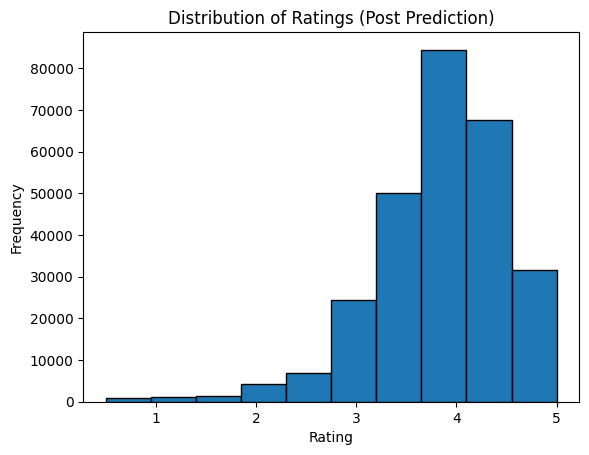

In [30]:
# Plotting histogram after adding the ratings for empty fields
predicted_ratings_flat = predicted_ratings_df.values.flatten()
plt.hist(predicted_ratings_flat, bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings (Post Prediction)')
plt.show()

For the next step as we have the dataframe with the predictions for unrated movies for all the users. We will be recommending movies to the users, for this we will be comparing the predictions with the actual user matrix, and find the movies which user has not rated. Then we will be just giving the first 10 movies that user has not watched and have high rating.

In [82]:
#Recommend movies to the users
prediction_for_user=4
actual_user_matrix_values=user_matrix.iloc[prediction_for_user]
predictions_matrix_values=predicted_ratings_df.iloc[prediction_for_user]

In [78]:
# Approach without using Pandas series
# recommendation_matrix=[]
# movie_rating_pairs = list(actual_user_matrix_values.items())
# predictions_rating_pairs=list(predictions_matrix_values.items())
# for i in range(len(movie_rating_pairs)):
#     actMovieId,actRating=movie_rating_pairs[i]
#     predMovieId,predRating=predictions_rating_pairs[i]
#     if actRating==0 and predRating>4:
#         recommendation_matrix.append(predMovieId)
# print(recommendation_matrix)

In [84]:
#Approach using Pandas series
recommendations= predictions_matrix_values[(actual_user_matrix_values==0) & (predictions_matrix_values>3)].index.tolist()
print(f' Recommendations for user to watch movies based on the movies they have watched previously are: ')
print(recommendations)

 Recommendations for user to watch movies based on the movies they have watched previously are: [2, 3, 6, 7, 10, 11, 16, 17, 19, 25, 32, 47, 48, 62, 70, 95, 104, 111, 141, 145, 158, 161, 163, 165, 168, 172, 173, 185, 208, 223, 231, 235, 260, 288, 292, 293, 317, 329, 333, 337, 339, 350, 353, 356, 368, 370, 377, 420, 434, 435, 440, 454, 466, 480, 500, 508, 509, 520, 539, 541, 551, 552, 553, 555, 586, 587, 593, 648, 653, 673, 708, 733, 736, 750, 778, 780, 784, 786, 788, 858, 903, 904, 908, 910, 912, 919, 923, 924, 953, 1028, 1035, 1036, 1073, 1079, 1080, 1089, 1090, 1097, 1101, 1127, 1136, 1148, 1193, 1196, 1197, 1198, 1199, 1200, 1201, 1203, 1206, 1207, 1208, 1210, 1213, 1214, 1215, 1219, 1220, 1221, 1222, 1225, 1230, 1234, 1240, 1246, 1247, 1252, 1258, 1259, 1265, 1270, 1276, 1278, 1282, 1288, 1291, 1302, 1304, 1307, 1356, 1370, 1374, 1377, 1380, 1387, 1391, 1393, 1394, 1407, 1466, 1485, 1500, 1517, 1527, 1544, 1552, 1573, 1580, 1584, 1608, 1610, 1617, 1625, 1639, 1641, 1645, 1653, 1676